This notebook produces the main result for Gemello. This notebook has already computed the result for Latent bayesian melding and FHMM and stored in a Pandas.Panel. We just pull the data from that Panel. Additionally, this notebook computes the main result. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

In [43]:
run all_functions.py

In [44]:
run features.py

In [37]:
!ls -lah accuracy.h5

-rw-r--r--  1 nipunbatra  staff   436K Feb  9 18:57 accuracy.h5


In [38]:
accuracy_store = pd.HDFStore("accuracy.h5")

In [39]:
accuracy_store

<class 'pandas.io.pytables.HDFStore'>
File path: accuracy.h5
/FHMM                        wide_table   (typ->appendable,nrows->510,ncols->6,indexers->[major_axis,minor_axis])
/LBM                         wide_table   (typ->appendable,nrows->510,ncols->6,indexers->[major_axis,minor_axis])
/N-NILM                      wide_table   (typ->appendable,nrows->445,ncols->6,indexers->[major_axis,minor_axis])
/Regional average            wide_table   (typ->appendable,nrows->445,ncols->6,indexers->[major_axis,minor_axis])

In [40]:
appliance_name_map = {"fridge":"Fridge","hvac":"HVAC","wm":"Washing\nmachine",
                      "dr":"Dryer","dw":"Dish\nwasher","light":"Lights"}

Now, producing the main result for Gemello. The main computation had been done by FILL THIS UP.

#### ACCURACY on the train set for Gemello

In [45]:
import json
appliances = ["dr","hvac","wm","dw","fridge","light"]
features = ["Static", "Monthly", "Monthly+Static"]

out={}
means = {}
sems = {}
for feature in features:
    out[feature]={}
    means[feature]={}
    sems[feature]={}
    for appliance in appliances:
    
        out[feature][appliance] = {}
        for home in all_homes[appliance]:
            try:
                j = json.load(open("../main-out-new/%s_%s_%d.json" %(appliance, feature, home),'r'))
                out[feature][appliance][int(home)] = j['accuracy']
            except:
                pass
                                     
train_df = pd.DataFrame({k:pd.DataFrame(out[k]).mean() for k in features})

In [46]:
train_df

,Monthly,Monthly+Static,Static
dr,27.399581,28.697681,26.140318
dw,21.222768,22.525817,19.941430
fridge,66.048773,68.082701,63.642268
hvac,76.502214,76.081346,68.980325
light,36.843681,36.792903,37.165298
wm,46.280977,47.294136,48.233818


For each appliance, we will choose the feature giving best accuracy on CV-train

In [47]:
to_use_feature = {}
for appliance in ["dr","hvac","wm","dw","fridge","light"]:
    to_use_feature[appliance] = train_df.ix[appliance].argmax()

In [48]:
to_use_feature

{'dr': 'Monthly+Static',
 'dw': 'Monthly+Static',
 'fridge': 'Monthly+Static',
 'hvac': 'Monthly',
 'light': 'Static',
 'wm': 'Static'}

### TEST

In [49]:
from constants import APPROACH as APPROACH_NAME

In [52]:
appliances = ["dr","hvac","wm","dw","fridge","light"]

out={}
means = {APPROACH_NAME:{}}
sems = {APPROACH_NAME:{}}

for appliance in appliances:
    feature=to_use_feature[appliance]
    

    out[appliance] = {}
    for home in all_homes[appliance]:
        try:

            out[appliance][int(home)] = pd.read_csv("../main-out-new/%s_%s_%d.csv" %(appliance, feature, home),
                                 header=None, index_col=0, names=["accuracy"]).squeeze()
        except Exception, e:
            print e


    means[APPROACH_NAME][appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().mean()
    sems[APPROACH_NAME][appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().sem()

In [53]:
means

{'Gemello': {'Dish\nwasher': 27.333401871684234,
  'Dryer': 33.052222078385938,
  'Fridge': 68.541552745826976,
  'HVAC': 76.239355252614146,
  'Lights': 42.757293980395275,
  'Washing\nmachine': 57.272795296939734}}

Now, getting data for LBM and FHMM

In [54]:
for approach in ["FHMM","LBM"]:

    fr = accuracy_store[approach]
    means[approach]={}
    sems[approach] = {}

    for appliance in ['hvac','fridge','dw','dr','light','wm']:
        if appliance=="hvac":
            start, stop=5, 11
        else:
            start, stop=1, 13
        
        temp = fr[appliance]
        if approach=='N-NILM':
            temp=temp.T
        means[approach][appliance_name_map[appliance]] = temp.ix[range(start,stop)].mean().mean()
        sems[approach][appliance_name_map[appliance]] = temp.ix[range(start,stop)].mean().sem()

In [55]:
main_df = pd.DataFrame(means)
se = pd.DataFrame(sems)

In [56]:
main_df

,FHMM,Gemello,LBM
Dish\nwasher,0.430750,27.333402,16.495110
Dryer,10.529382,33.052222,5.940615
Fridge,38.975759,68.541553,71.822239
HVAC,61.039103,76.239355,55.722782
Lights,33.414945,42.757294,11.290612
Washing\nmachine,0.130659,57.272795,29.972193


In [57]:
main_df = main_df.ix[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']]
se_df =se.ix[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']]

In [58]:
from common_functions import latexify, format_axes

In [59]:
main_df = main_df[["FHMM","LBM",APPROACH]]

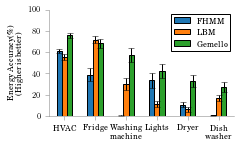

In [35]:
#latexify(columns=2, fig_height=2.6)
latexify(columns=1)

tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

main_df.plot(kind="bar",yerr=se_df,rot=0, colors=tableau20blind[::2])
plt.ylim((0,100))
plt.ylabel("Energy Accuracy(\%)\n(Higher is better)");
format_axes(plt.gca())
"""
ax = plt.gca()
for p in ax.patches:
    if p.get_height()<20:
        color="black"
        offset=5
    else:
        color="black"
        offset=-15
    ax.annotate(str(int(round(p.get_height(),0))), (p.get_x(), p.get_height() +offset), color=color, fontsize=6)
"""

plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/main_new.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/main_new.png",bbox_inches="tight")